In [1]:
from aoc2023 import day1
import numpy as np

In [2]:
data = day1.read_data_string("input.txt")
lines = day1.split_data(data) 
paragraphs = [day1.split_data_p(paragraph) for paragraph in day1.split_data_paragraphs(data)]

In [4]:
for i in range(len(lines)): 
    for j in range(len(lines[i])): 
        if lines[i][j] == "S": 
            print(i, j)
            break

25 108


In [5]:
lines[0]

'F-L----F7-7.F-7JJ.F--L-.F|F77.L|7.FLF-7.JJ--7FF-F-F7F7.7-F-7.L.FL7F|7--777.FJ-|7J-F-J-77-FF-F-7.JF77.L.JFL.L-|-FF7-77FL--F77.7-|77F7|7FF7-7-'

In [6]:
move = {
    "|": [(-1, 0), (1, 0),],
    "S": [(-1, 0), (1, 0),],
    "F": [(0, 1), (1, 0),],
    "J": [(-1, 0), (0, -1),],
    "L": [(-1, 0), (0, 1),],
    "7": [(0, -1), (1, 0),],
    "-": [(0, -1), (0, 1),],
    ".": [],
}

In [9]:
i_0, j_0 = (25, 108)
piece_0 = "|"
v_up_str = [f"{i_0},{j_0}", f"{i_0-1},{j_0}"]
# v_up = [(i_0, j_0), (i_0-1, j_0)]
v_down_str = [f"{i_0},{j_0}", f"{i_0},{j_0}"]
# v_down = [(i_0, j_0), (i_0+1, j_0)]

In [20]:
def get_last_position(v_pos): 
    coord = [int(x) for x in  v_pos[-1].split(",")]
    return coord


def get_new_positions(map, position): 
    pipe = map[position[0]][position[1]]
    new_pos = []
    for m in move[pipe]:
        n_p = (position[0] + m[0], position[1] + m[1])
        new_pos.append(n_p)
    return new_pos


def extend_position_vector(v_pos, new_positions): 
    extend_position = 0
    for p in new_positions: 
        p_string = f"{p[0]},{p[1]}"
        if p_string != v_pos[-2]: 
            if extend_position == 0: 
                extend_position = p_string
            else: 
                print(v_pos)
                print(new_positions)
                print(extend_position)
                raise ValueError("pos assigned already")
            
    
    if extend_position == 0: 
        raise ValueError("no pos assigned")
    
    v_pos.append(extend_position)


def check_for_overlap(v1, v2):
    set1 = set(v1[1:])
    set2 = set(v2[1:])
    return set1.intersection(set2)

In [23]:

v_up_str = [f"{i_0},{j_0}", f"{i_0-1},{j_0}"]
# v_up = [(i_0, j_0), (i_0-1, j_0)]
v_down_str = [f"{i_0},{j_0}", f"{i_0+1},{j_0}"]

In [24]:
overlap = False
while not overlap: 
    v_up = get_last_position(v_up_str)
    p_up = get_new_positions(lines, v_up)
    extend_position_vector(v_up_str, p_up)


    v_down = get_last_position(v_down_str)
    p_down = get_new_positions(lines, v_down)
    extend_position_vector(v_down_str, p_down)

    overlap = check_for_overlap(v_up_str, v_down_str)

In [30]:
v_up_str[-1]

'124,42'

In [31]:
v_down_str[-1]

'124,42'

In [33]:
len(v_up_str)

6702

In [17]:
v_down_str

['25,108', '25,108']

In [103]:
m_zeros = np.zeros((len(lines), len(lines[0])))

In [104]:
v_lines = [
    "|",
    "S",
    "J",
    "L",]

In [105]:
m_zeros
for v in v_up_str: 
    x, y = [int(x) for x in  v.split(",")]
    if lines[x][y] in v_lines:
        m_zeros[x,y] = 2
    else:
        m_zeros[x,y] = 1

for v in v_down_str: 
    x, y = [int(x) for x in  v.split(",")]
    if lines[x][y] in v_lines:
        m_zeros[x,y] = 2
    else:
        m_zeros[x,y] = 1

In [106]:
num_in = 0
for i in range(np.shape(m_zeros)[0]): 
    for j in range(np.shape(m_zeros)[1]):
        if m_zeros[i,j] == 0: 
            if np.sum(m_zeros[i][:j] == 2) % 2 == 1: 
                num_in+=1

In [107]:
num_in

303

In [62]:
m_zeros

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
directions = [(1,1), (1,0), (1,-1), 
              (0,1), (0,-1), 
              (-1,1), (-1,0), (-1,-1)]

In [92]:
to_populate = [(0,0)]
while len(to_populate) > 0:
    element = to_populate.pop()
    m_zeros[element[0], element[1]] = 3
    for d in directions: 
        try: 
            if m_zeros[element[0] + d[0], element[1] + d[1]] == 0: 
                to_populate.append((element[0] + d[0], element[1] + d[1]))
        except IndexError:
            pass


In [53]:
populate_matrix((0, 0))

RecursionError: maximum recursion depth exceeded in comparison

In [69]:
np.size(m_zeros)-np.count_nonzero(m_zeros)

570

In [67]:
np.count_nonzero(m_zeros)

19030

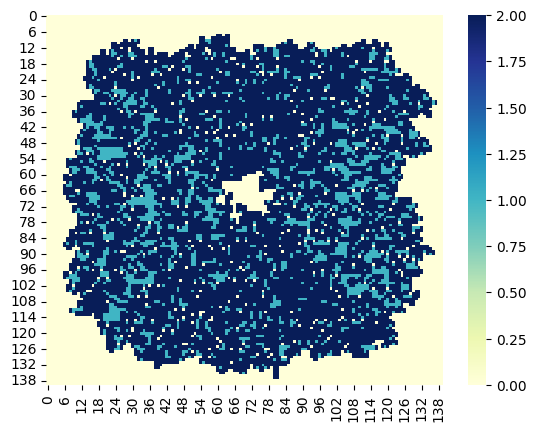

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap
sns.heatmap(m_zeros, cmap="YlGnBu")

# Show the plot
plt.show()